[Oregon Curriculum Network](http://www.4dsolutions.net/ocn) <br />
[Discovering Math with Python](Introduction.ipynb)

# Generating the Face Centered Cubic lattice (FCC)

The Face Centered Cubic lattice is equivalently the [CCP](https://www.saylor.org/content/watkins_flattice/10ccpcoor.html) (cubic centered packing) and the [IVM](http://www.grunch.net/synergetics/ivm.html) the way we're thinking of it here.

IVM = Isotropic Vector Matrix which is what Buckminster Fuller dubbed it, drawing attention to the same-length segments between any sphere center and its twelve neighbors.  He was able to patent the IVM in the form of [the octet-truss](http://www.grunch.net/synergetics/octet.html), even though Alexander Graham Bell had done some earlier work with the same space frame.

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/5436831548/in/photolist-5AA1JF-wWKQmk-bdBsk4-a3doND-9mY873-9hrbAY-8awzCS-7Fw23Z-7dcs4X-6BY6va-6oqjem-6i5oRw-5SXuYP-5PjRWV-5xe2b6-5sHnxN-5rFY8v-2yoZR2" title="Bell&#x27;s Octet Truss"><img src="https://farm5.staticflickr.com/4112/5436831548_feefdbb9a0.jpg" width="500" height="387" alt="Bell&#x27;s Octet Truss"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Shown below are the twelve neighbors of a nuclear sphere at the center.

One frequency:

!["freq1"](freq1.png)

You can see the above is somewhat similar to the C6XTY implementation below, which exists outside of the world of computer graphics, in the real world of load-bearing structures.

Sam Lanahan's C6XTY does not use struts directly between FCC vertexes as Bell and Fuller did.  Rather, there's a 3-way weave of mutually orthogonal connecting members that attach to the outer surfaces of the compression members.  Flextegrity, of which C6XTY is one version, has some similarities with Kenneth Snelson's tensegrity, hence the name.

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/36414328814/in/album-72157682843938980/" title="DSCF9142"><img src="https://farm5.staticflickr.com/4339/36414328814_f218834e5e.jpg" width="500" height="375" alt="DSCF9142"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Welcome to the [Jupyter Notebook world](https://www.theatlantic.com/science/archive/2018/04/the-scientific-paper-is-obsolete/556676/) by the way, well represented on Github, which renders said Notebooks just fine on sufficiently large displays.  You won't see embedded Youtubes.  Copy and paste the public URL for this Notebook into [nbviewer](http://nbviewer.jupyter.org/) for an even more complete rendering, Youtubes included.

My practice around Portland, Oregon is to introduce this technology to high school and middle school kids, on the assumption they'll be glad of these skills come college or some professional career that involves documentating computations. I sometimes call it [Martian Math](https://github.com/4dsolutions/MartianMath).

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/43001358632/in/album-72157695209731812/" title="P1050681"><img src="https://farm2.staticflickr.com/1782/43001358632_91353c62b8.jpg" width="500" height="333" alt="P1050681"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

My technique for generating the above computer graphic is to add all permutations of {2, 1, 1, 0} to the nuclear (0, 0, 0, 0).  I use vector addition.  But then this is not using the XYZ coordinate system.  Let me explain.

First though, lets use the itertools.permutations algorithm treats the two 1s as distinct and so creates more permutations than we need.

Those permutations are:

In [1]:
from itertools import permutations
g = permutations((2,1,1,0))
unique = {p for p in g}  # set comprehension
print(unique)

{(0, 1, 1, 2), (1, 0, 1, 2), (2, 0, 1, 1), (0, 2, 1, 1), (0, 1, 2, 1), (1, 2, 1, 0), (1, 1, 2, 0), (2, 1, 1, 0), (1, 0, 2, 1), (1, 2, 0, 1), (2, 1, 0, 1), (1, 1, 0, 2)}


What we're talking about here are ["Quadrays"](https://en.wikipedia.org/wiki/Quadray_coordinates) i.e. vectors built from linear combinations of four basis rays from the center of a regular tetrahedron to its four corners.  Think of the methane molecule (carbon in the middle, a hydrogen at each vertex).

![quadrays](https://upload.wikimedia.org/wikipedia/commons/9/99/Quadray.gif)

One might say [a caltrop](https://www.google.com/search?q=caltrop&safe=strict&source=lnms&tbm=isch) (this shape) is a "beacon" with four spokes.  A beacon is a set of radiating spokes with a common origin.  The "jack" of six spokes is likewise a beacon.  A sea urchin is like a beacon of many spokes in a spherical arrangement.  Think of how [a lighthouse beacon](https://www.google.com/search?q=beacon&safe=strict&source=lnms&tbm=isch) radiates in a sweepout pattern.

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/21089803385/in/photolist-24Qv2m5-Tv7QFj-xbEKyU-xbKB72-y8CKMK-xamAiS" title="caltrops"><img src="https://farm6.staticflickr.com/5630/21089803385_229c5d70db_n.jpg" width="320" height="295" alt="caltrops"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Quadrays, properly calibrated, have the advantage of assigning non-negative integer coordinates to all FCC lattice points.

The system for getting successive layers of 1, 12, 42, 92... balls, is to add these twelve unique vectors to each ball center, while only keeping those *not* already in the current layer, and *not* in the previous layer.  In other words, we force "the database" (currently just named layers in memory) to enlarge only in the direction of new unique spheres.  Every sphere in the current layer is the source of twelve new ones, but only a few of those will be kept, and added to the next layer.

Put another way:  The algorithm for getting successive layers of balls (1, 12, 42, 92...) is to add all 12 balls around every ball in shell N, but then discard the redundant ones.  All those balls already in shell N or shell N-1 are ignored, meaning only balls in shell N+1 are added.

We keep track of the separate layers such the the two previous layers become input to the function for computing the next.  See ```next_layer``` below.

I have the ability to convert [Quadrays](Computing%20Volumes.ipynb) to XYZ vectors.  Once the algorithm has located all the balls in the next layer, I get the XYZ equivalents as no rendering software has any native understanding of Quadrays.

In [2]:
import qrays

nucleus = tuple([qrays.Qvector((0,0,0,0))])

cubocta = tuple(map(qrays.Qvector,    # a "beacon" of 12 spokes
         ((0, 1, 1, 2), (1, 0, 1, 2), 
          (2, 0, 1, 1), (0, 2, 1, 1), 
          (0, 1, 2, 1), (1, 2, 1, 0), 
          (1, 1, 2, 0), (2, 1, 1, 0), 
          (1, 0, 2, 1), (1, 2, 0, 1), 
          (2, 1, 0, 1), (1, 1, 0, 2))))

def next_layer(curr_layer, prev_layer):
    """
    generates a next layer of FCC spheres by trying 12-around-1 
    for each in the current layer (curr_layer) but without keeping
    any duplicates i.e. discarding redundant sphere centers.
    """
    next_layer = set()
    for qv in curr_layer:
        for bv in cubocta:
            v_sum = qv + bv
            if (not v_sum in curr_layer 
                and not v_sum in prev_layer):
                next_layer.add(v_sum)
    return sorted(list(next_layer))

nl   = next_layer(nucleus, nucleus) # 1-freq
nnl  = next_layer(nl, nucleus)      # 2-freq
nnnl = next_layer(nnl, nl)          # 3-freq
nnnnl= next_layer(nnnl, nnl)        # 4-freq
print("Number of balls in successive layers:")
print(len(nl))     # 12 around 1
print(len(nnl))    # should be 42 unique balls
print(len(nnnl))   # expecting 92 unique balls
print(len(nnnnl))  # the next next next next layer

Number of balls in successive layers:
12
42
92
162


See the [Online Encyclopedia of Integer Sequences](http://oeis.org/A005901) for more information on this sequence (and maybe scroll down to find my name in the links section, Urner, K.).  As we learn from observing the Jitterbug Transformation, the cuboctahedral shells may transform into Icosahedral shells, which is why the number sequences are the same.

The final step involves generating scene description language and interpolating the resulting instructions into a POV-Ray script.

In [3]:
sph = """sphere { %s 0.5 texture { pigment { color rgb <1,0,0> } } }"""
    
def get_xyz(qvectors):
    xyz_vectors = []
    for qv in qvectors:
        xyz_vectors.append(qv.xyz())
    return xyz_vectors

def make_spheres(xyz_vectors, fname="fragment.pov", append=True):
    if append:
        pov = open(fname, "a")
    else:
        pov = open(fname, "w")       
    print("#declare cubocta = union{", file=pov)
    for xyzv in xyz_vectors:
        s = sph % "<{0.x}, {0.y}, {0.z}>".format(xyzv)
        print(s, file=pov)
    print("}\n", file=pov)
    print("object{cubocta scale<0.5, 0.5, 0.5>}", file=pov)
        
xyz_vs = get_xyz(nnl)
make_spheres(xyz_vs, fname="fragment.pov", append=False)

xyz_vs = get_xyz(nnnl)
make_spheres(xyz_vs, fname="fragment.pov")

Here's what scene description language looks like:

<pre>
sphere { &lt;0.0, -0.7071067811865475, -0.7071067811865475&gt; 
         0.5 texture { pigment { color rgb &lt;1,0,0&gt; } } }
sphere { &lt;0.0, -0.7071067811865475, 0.7071067811865475&gt; 
         0.5 texture { pigment { color rgb &lt;1,0,0&gt; } } }
</pre>

...and so on.

Two frequency:

!["freq1"](freq2.png)

While we're at it, lets start building a Pandas data structure for managing some of this data.  I like to have rows for each ball in each layer, with both "ivm" (quadray) and "xyz" vectors side by side.  Pandas has hierarchical indexes allowing conceptual partitioning of both rows and columns.

Lets start off building these two indexes.  The MultiIndex object offers several strategies for self defining.  I'm going with the ```from_tuples``` method both times, pairing more general with more specific.  For example, going across, I'll have four columns devoted to "caltrop coordinates" the three for "jack-style" with negative numbers performing an invert operation (a kind of rotation?).

In [4]:
import pandas as pd
import numpy as np

arrays = [['ivm'] * 4 + ['xyz'] * 3,
          ['a', 'b', 'c', 'd', 'x', 'y', 'z',]]

tuples = list(zip(*arrays))
colindex = pd.MultiIndex.from_tuples(tuples, names=['Vtype', 'Coords'])
#%%
arrays = [['layer0'] + ['layer1'] * 12 + ['layer2'] * 42,
          range(1 + 12 + 42)]

tuples = list(zip(*arrays))
rowindex = pd.MultiIndex.from_tuples(tuples, names=['Shell', 'Ball'])

Now comes the interesting part, where we stack the nuclear row, and the 12-around-nucleus layer vertically, as numpy arrays, then pour those total of 13 balls into our multi-indexed DataFrame object.

In [5]:
layer0 = np.zeros((1,7), dtype=np.float)
layer0[0, :] = tuple(nucleus[0].coords) + tuple(nucleus[0].xyz().xyz)

layer1 = np.zeros((12,7), dtype=np.float)
for idx in range(12):
    layer1[idx,:] = tuple(nl[idx].coords) + tuple(nl[idx].xyz().xyz) 

layer2 = np.zeros((42,7), dtype=np.float)
for idx in range(42):
    layer2[idx,:] = tuple(nnl[idx].coords) + tuple(nnl[idx].xyz().xyz) 

allvectors = np.vstack([layer0, layer1, layer2])  # vertical stack two numpy.ndarray objects

pd.options.display.float_format = '{:,.3f}'.format
ve = pd.DataFrame(allvectors, index = rowindex, columns = colindex)
ve.loc[:,['ivm']] = ve.loc[:,['ivm']].astype(np.int)
ve

Vtype       ivm             xyz              
Coords        a  b  c  d      x      y      z
Shell  Ball                                  
layer0 0      0  0  0  0  0.000  0.000  0.000
layer1 1      0  1  1  2  0.000 -0.707 -0.707
       2      0  1  2  1 -0.707  0.000 -0.707
       3      0  2  1  1 -0.707 -0.707  0.000
       4      1  0  1  2  0.707  0.000 -0.707
       5      1  0  2  1  0.000  0.707 -0.707
       6      1  1  0  2  0.707 -0.707  0.000
       7      1  1  2  0 -0.707  0.707  0.000
       8      1  2  0  1  0.000 -0.707  0.707
       9      1  2  1  0 -0.707  0.000  0.707
       10     2  0  1  1  0.707  0.707  0.000
       11     2  1  0  1  0.707  0.000  0.707
       12     2  1  1  0  0.000  0.707  0.707
layer2 13     0  0  1  3  0.707 -0.707 -1.414
       14     0  0  2  2  0.000  0.000 -1.414
       15     0  0  3  1 -0.707  0.707 -1.414
       16     0  1  0  3  0.707 -1.414 -0.707
       17     0  1  3  0 -1.414  0.707 -0.707
       18     0  2  0  2  0.000 -1.414  0.000
       19     0  2  2  0 -1.414  0.000  0.000
       20     0  2  2  4  0.000 -1.414 -1.414
       21     0  2  3  3 -0.707 -0.707 -1.414
       22     0  2  4  2 -1.414  0.000 -1.414
       23     0  3  0  1 -0.707 -1.414  0.707
       24     0  3  1  0 -1.414 -0.707  0.707
       25     0  3  2  3 -0.707 -1.414 -0.707
       26     0  3  3  2 -1.414 -0.707 -0.707
       27     0  4  2  2 -1.414 -1.414  0.000
       28     1  0  0  3  1.414 -0.707 -0.707
       29     1  0  3  0 -0.707  1.414 -0.707
       30     1  3  0  0 -0.707 -0.707  1.414
       31     2  0  0  2  1.414  0.000  0.000
       32     2  0  2  0  0.000  1.414  0.000
       33     2  0  2  4  1.414  0.000 -1.414
       34     2  0  3  3  0.707  0.707 -1.414
       35     2  0  4  2  0.000  1.414 -1.414
       36     2  2  0  0  0.000  0.000  1.414
       37     2  2  0  4  1.414 -1.414  0.000
       38     2  2  4  0 -1.414  1.414  0.000
       39     2  3  0  3  0.707 -1.414  0.707
       40     2  3  3  0 -1.414  0.707  0.707
       41     2  4  0  2  0.000 -1.414  1.414
       42     2  4  2  0 -1.414  0.000  1.414
       43     3  0  0  1  1.414  0.707  0.707
       44     3  0  1  0  0.707  1.414  0.707
       45     3  0  2  3  1.414  0.707 -0.707
       46     3  0  3  2  0.707  1.414 -0.707
       47     3  1  0  0  0.707  0.707  1.414
       48     3  2  0  3  1.414 -0.707  0.707
       49     3  2  3  0 -0.707  1.414  0.707
       50     3  3  0  2  0.707 -0.707  1.414
       51     3  3  2  0 -0.707  0.707  1.414
       52     4  0  2  2  1.414  1.414  0.000
       53     4  2  0  2  1.414  0.000  1.414
       54     4  2  2  0  0.000  1.414  1.414

Three frequency:

![freq3](freq3.png)

Four frequency:

![freq4](freq4.png)

[C6XTY](http://www.c6xty.com) at [Saturday Academy](http://www.4dsolutions.net/satacad/martianmath/toc.html)

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/27156123767/in/dateposted-public/" title="Product Placement"><img src="https://farm1.staticflickr.com/954/27156123767_6eecddea25.jpg" width="500" height="375" alt="Product Placement"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Many thanks to our sponsor.  Related reading on [edu-sig](https://mail.python.org/pipermail/edu-sig/2018-May/011829.html).

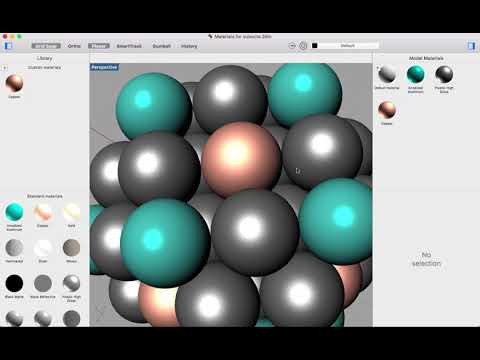

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo("rGMrTWPxPZg")

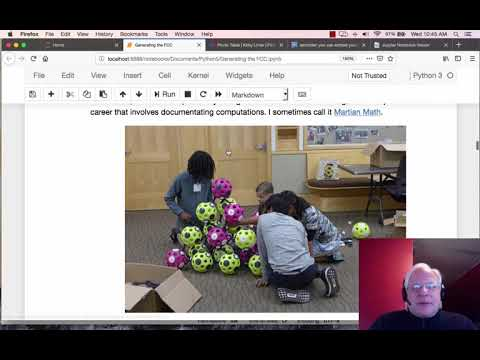

In [7]:
YouTubeVideo("ilGCHYgZITY")

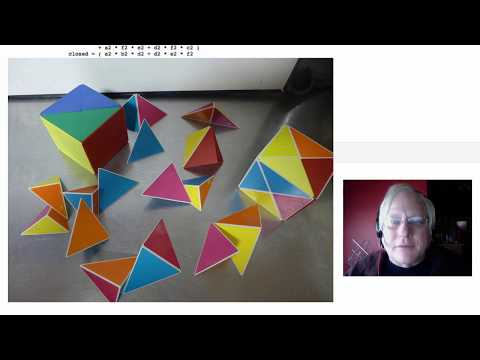

In [8]:
YouTubeVideo("9L5x-C1EglY")